In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
original_waypoints = np.loadtxt('traj_raceline_0.5margin.csv', delimiter=',')

In [4]:
def plot_waypoints(waypoints):
    plt.plot(waypoints[:,0], waypoints[:,1], 'r')
    plt.plot(waypoints[:,0], waypoints[:,1], 'ro')
    plt.axis('equal')
    plt.show()

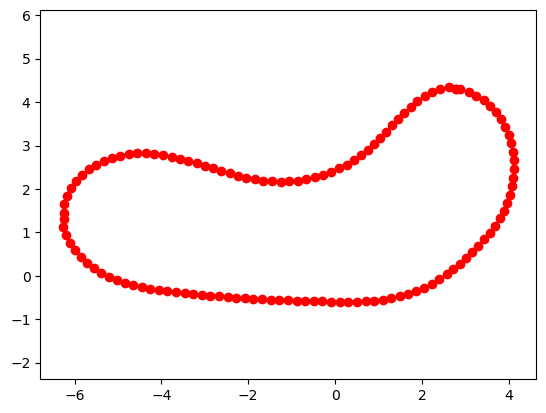

In [5]:
plot_waypoints(original_waypoints)